In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.cluster as cluster

In [4]:
diabetic_df = pd.read_csv('diabetic_data.csv')
diabetic_df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
dataframe = diabetic_df.iloc[:, 12:18].values
pd.DataFrame(dataframe)

,0,1,2,3,4,5
0,41,0,1,0,0,0
1,59,0,18,0,0,0
2,11,5,13,2,0,1
3,44,1,16,0,0,0
4,51,0,8,0,0,0
...,...,...,...,...,...,...
101761,51,0,16,0,0,0
101762,33,3,18,0,0,1
101763,53,0,9,1,0,0
101764,45,2,21,0,0,1


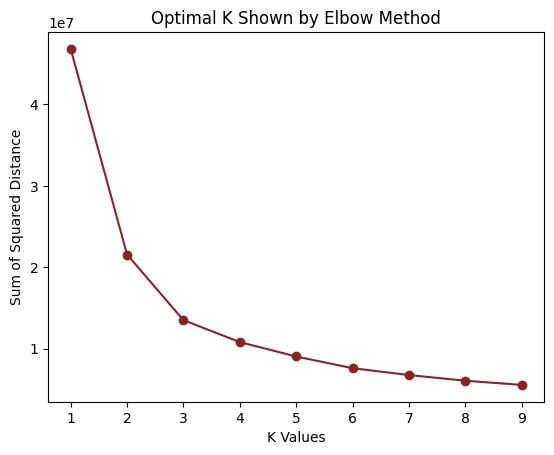

EXPLANATION: The optimal K value based on the Elbow Method is 2. This is determined by identifying the part of the graph that begins decreasing in a linear fashion


In [6]:
#using Kmeans on dataset to find sum of least square errors for each value, and then plot on to an elbow graph
sum_least_sq = []
K = range(1,10)
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(dataframe)
    sum_least_sq.append(kmeans.inertia_)

plt.plot(K, sum_least_sq, marker='o', color='#8B2323')
plt.title('Optimal K Shown by Elbow Method')
plt.xlabel('K Values')
plt.ylabel('Sum of Squared Distance')
plt.show()

print('EXPLANATION: The optimal K value based on the Elbow Method is 2. This is determined by identifying the part of the graph that begins decreasing in a linear fashion')

In [7]:
#Finding Centroids
k_means = cluster.KMeans(n_clusters=2, max_iter=100)
k_means.fit(dataframe) 
labels = k_means.labels_
center = k_means.cluster_centers_
print(center)

[[56.29176479  1.38195519 17.63035726  0.36449573  0.19923636  0.68170961]
 [24.55482819  1.28040365 13.76185187  0.37618755  0.19586898  0.57073309]]


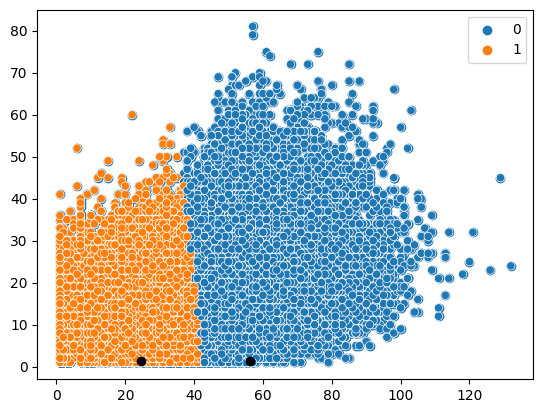

Using K means we see that there are indeed two separate clusters that can be formed/determined, and therefore confirming that k=2


In [8]:
#Scatter Method
plt.scatter(dataframe[:,0], dataframe[:,2]) 

# Plotting the centroids
sns.scatterplot(x=dataframe[:,0], y=dataframe[:,2], hue=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1],c='black')
plt.show()

print('Using K means we see that there are indeed two separate clusters that can be formed/determined, and therefore confirming that k=2')